# Titanic Survival Analysis: Exploratory Data Analysis & Data Cleaning

**Objective:**  
Analyze the Titanic dataset to uncover key factors influencing passenger survival, with a focus on data cleaning, feature engineering, statistical analysis, and insightful visualizations.

**Dataset:**  
Seaborn's built-in Titanic dataset (`sns.load_dataset('titanic')`), containing 891 passenger records with demographic and survival information.


### 1. Setup the environment
##### Install the required libraries 

In [39]:
pip install pandas numpy seaborn matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##### Import the libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### 2. Load the dataset
##### Download the titanic dataset from Kaggle or use the Seaborn's built-in version for practice.
##### I have used the Seaborn's built-in version.

In [4]:
# Using Seaborn's built-in dataset
df = sns.load_dataset('titanic')


### 3. Initial Data Exploration (or) Inspecting the data

##### A quick way to check out the contents of our data frame is by getting the first 5 rows using the function .head()

In [5]:
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


##### To see what type of data is present within each column we use .info() method

In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


##### To see if the data is reasonably distributed or if there are any anomalies or mistakes, we would like to check out their mean, maximum, minimum values. To display a column of statistics for each column, use .describe() method

In [7]:
print(df.describe(include='all'))

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

##### Check for missing values

In [8]:
print(df.isnull().sum())


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64



- Loaded the Titanic dataset using Seaborn.
- Previewed the first few rows to understand the structure.
- Inspected data types and checked for missing values.

**Key Observations:**
- 15 columns, including demographic, ticket, and survival info.
- Missing values in `age`, `embarked`, `deck`, and `embark_town`.

### 4. Data Cleaning

### a. Handling Missing Values
- Filled missing `age` values with the median age.
- Filled missing `embarked` values with the mode (most common port).
- For `deck` (many missing values), added a new category `'Unknown'` and filled missing values with it.


In [9]:
# Handle missing values
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Add 'Unknown' as a valid category BEFORE filling missing values
df['deck'] = df['deck'].cat.add_categories(['Unknown'])  # Add new category
df['deck'] = df['deck'].fillna('Unknown')  # Now fill safely



C:\Users\tumma\AppData\Local\Temp\ipykernel_4396\2233568439.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
C:\Users\tumma\AppData\Local\Temp\ipykernel_4396\2233568439.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

### b. Data Type Corrections
- Converted `pclass`, `sex`, and `embarked` to categorical types for more efficient analysis.

In [10]:
df['pclass'] = df['pclass'].astype('category')
df['sex'] = df['sex'].astype('category')
df['embarked'] = df['embarked'].astype('category')


### c. Outlier Detection
- Visualized `age` and `fare` distributions using boxplots to identify outliers.
- No extreme outliers requiring removal, but noted high fares for a few first-class passengers.

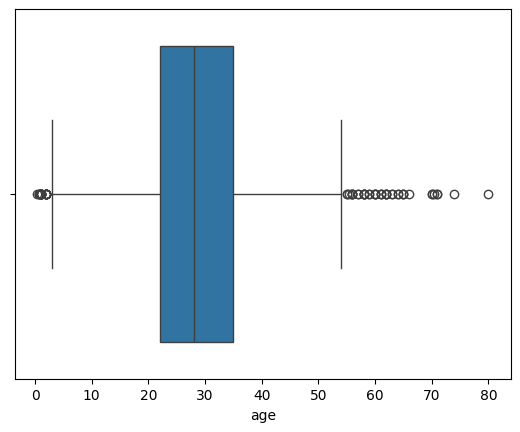

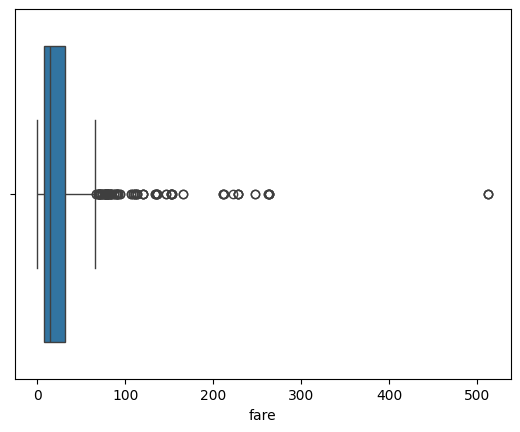

In [11]:
sns.boxplot(x=df['age'])
plt.show()
sns.boxplot(x=df['fare'])
plt.show()



### 5. Feature Engineering

##### Combine 'sibsp' and 'parch' to create a 'family_size' feature.

In [12]:
df['family_size'] = df['sibsp'] + df['parch'] + 1


##### Create a flag for passengers traveling alone.

In [13]:
df['is_alone'] = (df['family_size'] == 1).astype(int)


## 6. Exploratory Data Analysis (EDA)

### a. Survival Rate by Gender
- Used a bar plot to compare survival rates between males and females.

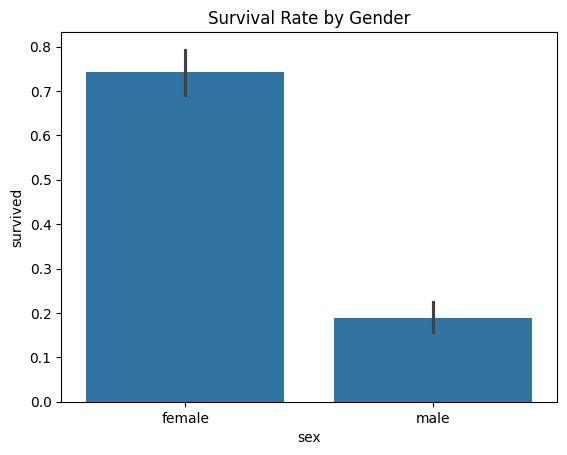

In [14]:
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()


- **Finding:** Females had a much higher survival rate (>70%) than males (<20%).

### b. Survival Rate by Passenger Class
- Used a bar plot to compare survival rates between the passenger classes (first class, second, third).

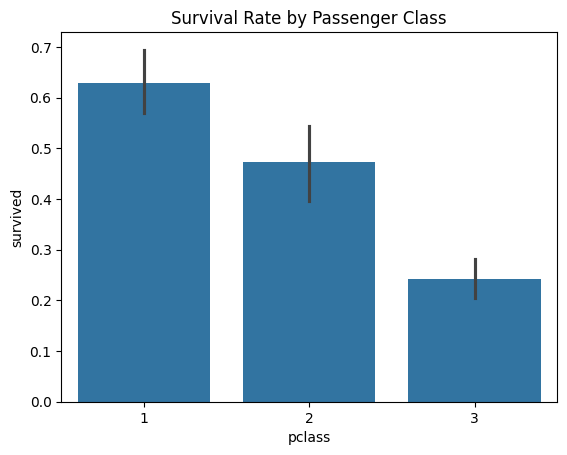

In [15]:
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()


- **Finding:** First class passengers (who paid more) had a much higher survival rate (>60%) than second and third class passengers who paid relatively less prices (second class around 47% and third class around 22%).

### c. Survival Rate by Gender in each passenger class
- Used a bar plot to compare survival rates between males and females in all the passenger classes (first class, second, third).

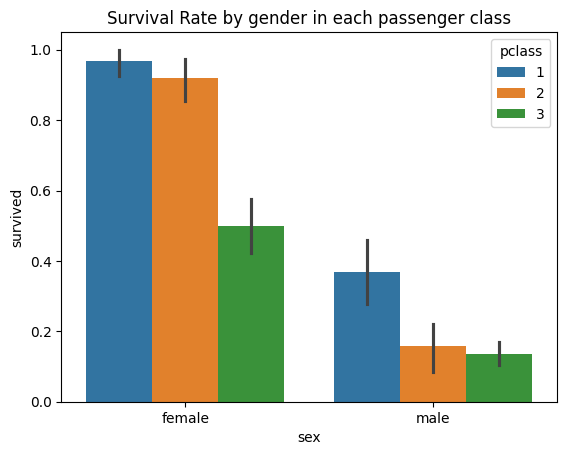

In [16]:
sns.barplot(x='sex', y='survived', hue='pclass', data=df)
plt.title('Survival Rate by gender in each passenger class')
plt.show()


- **Findings:** First class female passengers have high survival rate and third class males have very less survival rate comparatively. Third class female passengers have high survival rate than first class male passengers.

### d. Survival rate by Age group
- Used barplot to compare survival rate by Age group. The age groups are divided as: Child, Teen, Young Adult, Adult, Senior based on the ideal ages.

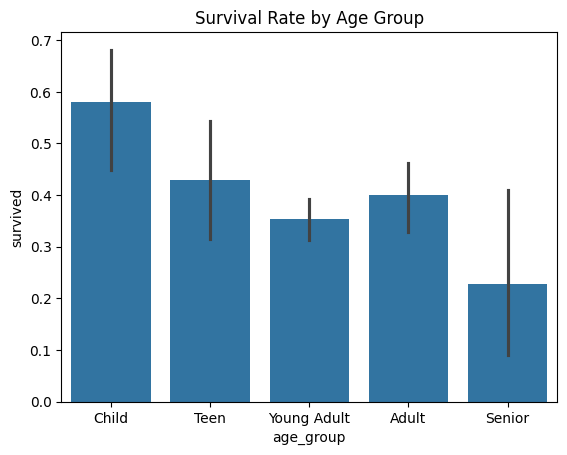

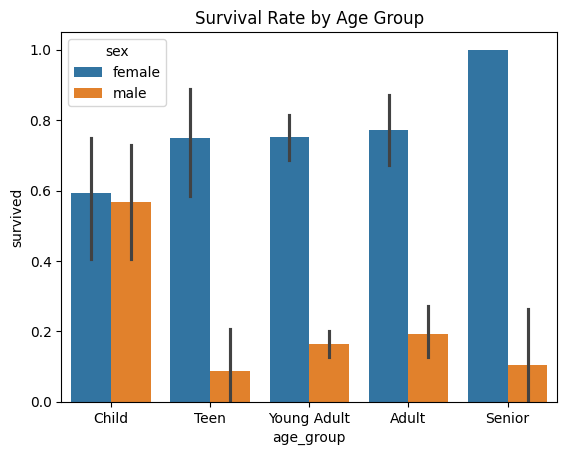

In [18]:
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 80], labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
sns.barplot(x='age_group', y='survived', data=df)
plt.title('Survival Rate by Age Group')
plt.show()

sns.barplot(x='age_group', y='survived', hue='sex', data=df)
plt.title('Survival Rate by Age Group')
plt.show()


- **Findings:** Senior female passengers have highest survival rate and teen males have lowest survival rate overall. Not considering the gender, in general children have high survival rate than other ages.

### e. Survival rate by Family size

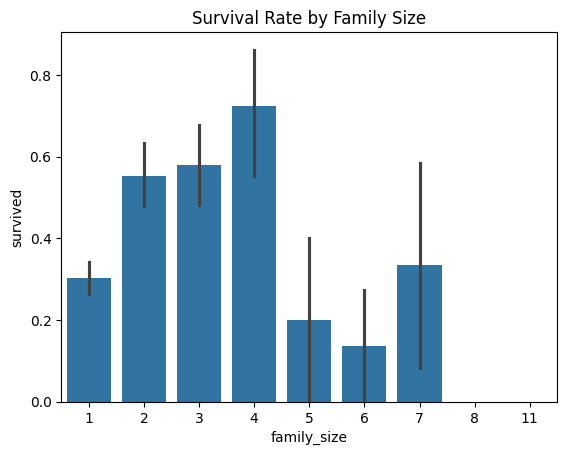

In [55]:
sns.barplot(x='family_size', y='survived', data=df)
plt.title('Survival Rate by Family Size')
plt.show()


- **Findings:** Families with median size(4) have high survival rate followed by family_size 3 and 2. The least survival rate is seen in family_size 6.

### f. Survival rate by Embarkation Port
- Embarkation Ports are marked with embark town C- Cherbourg, Q- Queenstown, S- Southampton

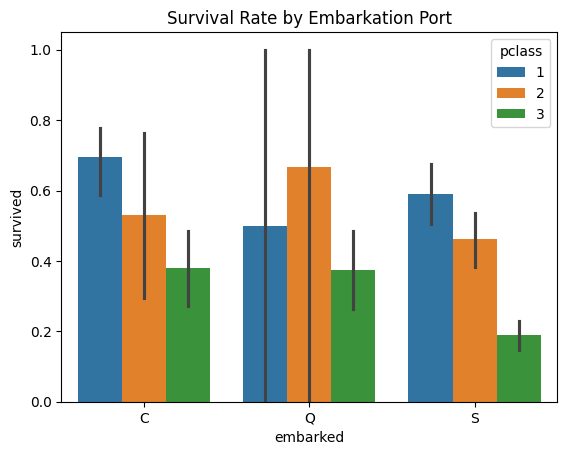

In [24]:
sns.barplot(x='embarked', y='survived', hue='pclass', data=df)
plt.title('Survival Rate by Embarkation Port')
plt.show()


- **Findings:** People who have embarked at Cherbourg have high survival rates comparatively. We can see survival rates for people who are from third class have lower survival rates regardless of their embarkation ports.

### g. Survival Rate by number of Siblings or Spouses Aboard.
- Used a bar plot to examine how the number of siblings/spouses aboard (`sibsp`) influenced survival rates, and whether this effect differed by gender.

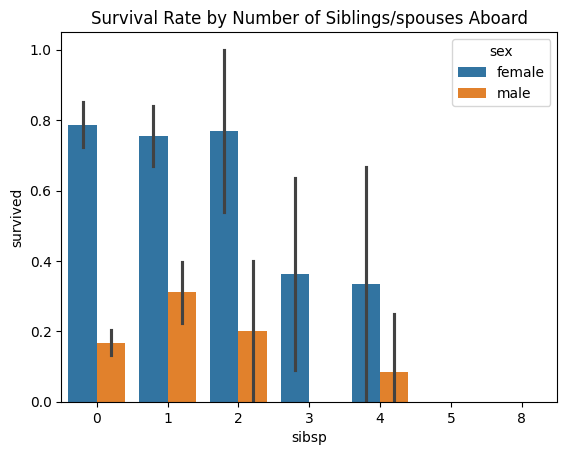

In [26]:
sns.barplot(x='sibsp', y='survived', hue='sex', data=df)
plt.title('Survival Rate by Number of Siblings/spouses Aboard')
plt.show()

- **Findings:**
  - Passengers traveling with 1 or 2 siblings/spouses had higher survival rates than those traveling alone or with large families.
  - Across all `sibsp` groups, women had a significantly higher survival rate than men.
  - Survival rates dropped for passengers with more than 2 siblings/spouses, especially among men.


### h. Survival Rate by Number of parents or children onboard
- Used a bar plot to examine how the number of parents/children aboard (`parch`) influenced survival rates, and whether this effect differed by gender.

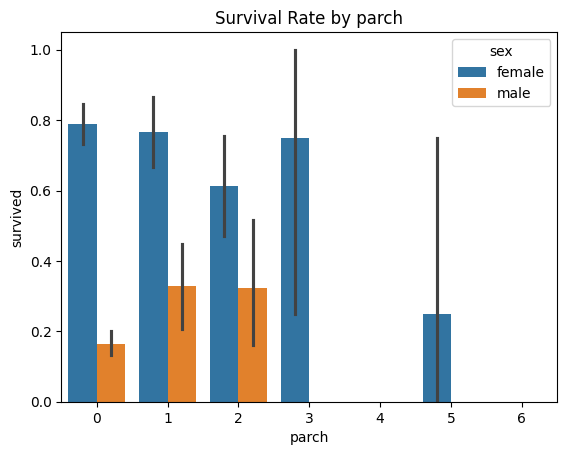

In [27]:
sns.barplot(x='parch', y='survived', hue='sex', data=df)
plt.title('Survival Rate by parch')
plt.show()


- **Findings:**  
  - Passengers traveling with 1–3 parents or children had higher survival rates than those traveling alone.
  - Survival rates dropped for passengers with more than 3 parents/children, possibly due to the difficulty of keeping large families together during evacuation.

### i. Distribution of ticket fares among different passenger classes.
- We used a box plot to examine how ticket fares varied across passenger classes and how this related to survival.

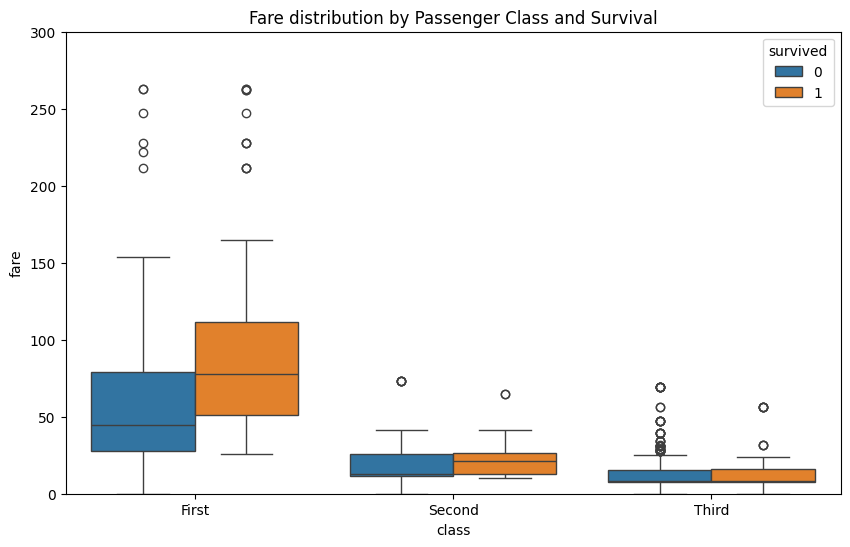

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='class', y='fare', hue='survived')
plt.ylim(0, 300)  # Limiting y-axis to 300 for better visualization
plt.title('Fare distribution by Passenger Class and Survival')
plt.show()

- **Findings:**  
  - First-class passengers paid significantly higher fares than those in second or third class.
  - Within first class, survivors tended to have paid higher fares than non-survivors.
  - In second and third class, fare differences between survivors and non-survivors were less pronounced, but survivors still often paid somewhat higher fares.
  - Most second and third class passengers paid fares below 100, with very few high outliers.
  - Overall, higher fare and higher class were associated with a greater likelihood of survival.

### Correlation matrix
- Makes a copy of the DataFrame to keep the original data intact.
- Encodes all categorical columns (both object and category types) as integer codes using cat.codes.
- Calculates the correlation matrix on the fully numeric DataFrame.
- Plots a heatmap to visualize the strength and direction of correlations between all features, including those that were originally categorical.

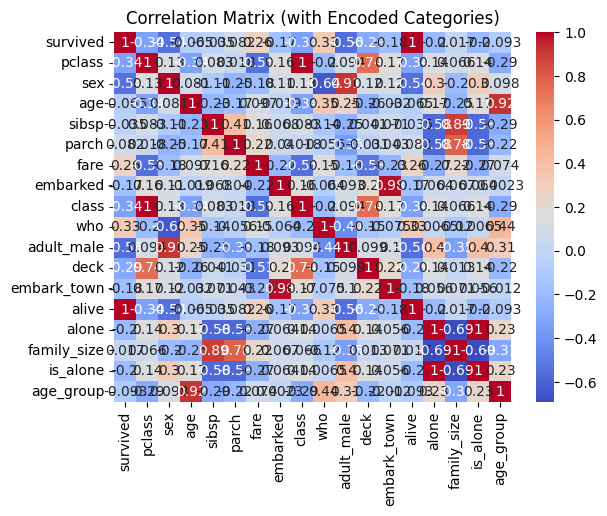

In [25]:
# Make a copy to avoid modifying the original DataFrame
df_encoded = df.copy()

# Encode categorical columns
for col in df_encoded.select_dtypes(include=['category', 'object']).columns:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (with Encoded Categories)')
plt.show()



- **Findings:**
  - Sex, Passenger class and fare have strongest correlations with survival.
  - Whereas is_alone, family size and age group have weak or negative correlations with survival.
  - Passengers who paid higher fares were more likely to survive, reflecting the advantage of wealth/status.
  - Passengers traveling alone were less likely to survive.
  - Younger passengers had a slightly higher chance of survival, but the effect is weak.
  - Higher class is associated with higher fare.
  - Demographics (gender, class, fare) are the strongest predictors of survival.
  - Other features (embarked, deck) are less predictive on their own but may add value in models.

### Multivariate Relationships: Pairplot of Age, Fare, and Family Size
- Used a Seaborn pairplot to visualize the relationships between `age`, `fare`, and `family_size`, colored by survival status.


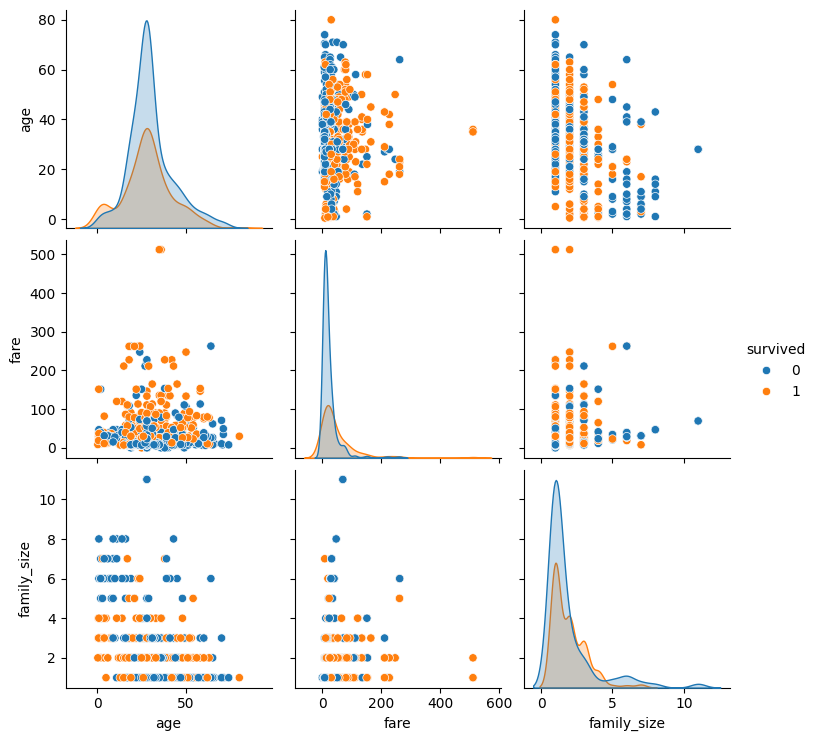

In [19]:
sns.pairplot(df, hue='survived', vars=['age', 'fare', 'family_size'])
plt.show()


- **Key Findings:**  
  - **Fare:** Survivors tended to pay higher fares, with a visible separation from non-survivors.
  - **Age:** Younger passengers had a higher chance of survival, but there were survivors across all age groups.
  - **Family Size:** Passengers with small to moderate family sizes were more likely to survive; those alone or with large families had lower survival rates.
  - **Combined Patterns:** The highest concentration of survivors is among passengers who were young, paid high fares, and had moderate family sizes.